# Test unitaire - Activité 4

---
Nom : CHIBANE

Prénom :Ilies

Groupe de TP : GP-IA & IA2S

---

> ☝ **Objectif :** Produire des représentations graphiques des résultats issus du traitement. Intégration de ces représentations dans la page Web.


Dans cette activité, nous allons mettre en valeur les données en utilisant d'une part `matplotlib` une bibliothèque complète permettant de créer des représentations graphiques en Python, et d'autre part `GeoPandas` une bibliothèque dérivée de `Pandas` pour l'analyse de données spatialisées en vue de la création de cartes à l'aide de la bilbliothèque `contextily`.

## Préambule

Avant toute chose, il faut importer les bibliothèques et modules utiles :

> ⛔ ne pas modifier le code donné ci-dessous.

In [1]:
# importations et configuration
#

# installation des bibliothèques geopandas et contextily dans l'environnement Colab
!pip install geopandas
!pip install contextily

import sys                      # pour l'accès au commandes système
from google.colab import drive  # pour l'accès au drive
import json                     # pour manipuler le format JSON
import pandas as pd             # pour extraire, calculer, publier
import geopandas as gpd         # pour la spatialisation des données
import matplotlib.pyplot as plt # pour les graphes
import contextily as ctx        # pour l'utilisation de cartes géographiques

# montage du drive sur Colab (avec autorisation d'accès)
drive.mount('/content/drive', force_remount=True)
# cliquez sur le lien affiché dans la console afin d'obtenir votre clé d'accès
# et recopiez cette clé dans la zone de saisie de texte.

# pour inclure les fonctions "faites maison" et spécifiques
sys.path.insert(0,'/content/drive/My Drive/Colab Notebooks/SAE15/tools')
import sae15_tools as tools
import sae15_spec as spec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 54.0 MB/s eta 0:00:00
Mounted at /content/drive


## Préparation des données

Il s'agit ici de réaliser les opérations suivantes :
1. lire les données statiques et dynamiques depuis l'API de Vélib' Métropole,
1. transformer les données 'stations' statiques et dynamiques en deux Data Frames (Pandas),
1. fusionner les deux Data Frames en un seul (jointure).

In [20]:
import urllib
def loadVelibInformation() :
  hdr = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
       'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
       'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
       'Accept-Encoding': 'none',
       'Accept-Language': 'en-US,en;q=0.8',
       'Connection': 'keep-alive'}
  site = 'https://velib-metropole-opendata.smovengo.cloud/opendata/Velib_Metropole/station_information.json'
  req = urllib.request.Request(site, headers=hdr)
  json_data = json.loads(urllib.request.urlopen(req).read())
  return(json_data)

def loadVelibStatus() :
  hdr = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
       'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
       'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
       'Accept-Encoding': 'none',
       'Accept-Language': 'en-US,en;q=0.8',
       'Connection': 'keep-alive'}
  site = 'https://velib-metropole-opendata.smovengo.cloud/opendata/Velib_Metropole/station_status.json'
  req = urllib.request.Request(site, headers=hdr)
  json_data = json.loads(urllib.request.urlopen(req).read())
  return(json_data)

In [21]:
# chargement des données statiques et dynamiques depuis l'API Vélib' Métropole
json_data_info = loadVelibInformation()
json_data_statu = loadVelibStatus()
# conversion en Data Frame Pandas
info_stations = tools.getVelibStations(json_data_info)
df_info_stations = pd.DataFrame.from_dict(info_stations)
statu_stations = tools.getVelibStations(json_data_statu)
df_statu_stations = pd.DataFrame.from_dict(statu_stations)
# fusion des deux Data Frames selon l'id des stations (fonction merge)
merged_data = pd.merge(df_info_stations, df_statu_stations, on=['station_id', 'stationCode'])
# affichage du résultat
merged_data

station_id                                   name        lat       lon  \
0       213688169          Benjamin Godard - Victor Hugo  48.865983  2.275725   
1       653222953              Mairie de Rosny-sous-Bois  48.871257  2.486581   
2     17278902806             Rouget de L'isle - Watteau  48.778193  2.396302   
3           36255                     Toudouze - Clauzel  48.879296  2.337360   
4        37815204                        Mairie du 12ème  48.840855  2.387555   
...           ...                                    ...        ...       ...   
1464     54000604                 Ordener - Poissonniers  48.891214  2.351289   
1465     43247738                     Ruisseau - Ordener  48.892995  2.340145   
1466    102311820                 Clignancourt - Ordener  48.891458  2.348636   
1467    368766689  Westermeyer - Paul Vaillant-Couturier  48.819116  2.396664   
1468    315022587    Malesherbes - Place de la Madeleine  48.870406  2.323244   

      capacity stationCode rental_methods  num_bikes_available  \
0           35       16107            NaN                    2   
1           30       31104   [CREDITCARD]                   22   
2           20       44015            NaN                   14   
3           21        9020   [CREDITCARD]                    9   
4           30       12109            NaN                   16   
...        ...         ...            ...                  ...   
1464        35       18023   [CREDITCARD]                    3   
1465        35       18026   [CREDITCARD]                   11   
1466        35       18024   [CREDITCARD]                    2   
1467        25       42004   [CREDITCARD]                   24   
1468        67        8004   [CREDITCARD]                   76   

      numBikesAvailable            num_bikes_available_types  \
0                     2    [{'mechanical': 1}, {'ebike': 1}]   
1                    22   [{'mechanical': 4}, {'ebike': 18}]   
2                    14   [{'mechanical': 0}, {'ebike': 14}]   
3                     9    [{'mechanical': 2}, {'ebike': 7}]   
4                    16   [{'mechanical': 12}, {'ebike': 4}]   
...                 ...                                  ...   
1464                  3    [{'mechanical': 1}, {'ebike': 2}]   
1465                 11   [{'mechanical': 1}, {'ebike': 10}]   
1466                  2    [{'mechanical': 0}, {'ebike': 2}]   
1467                 24   [{'mechanical': 18}, {'ebike': 6}]   
1468                 76  [{'mechanical': 63}, {'ebike': 13}]   

      num_docks_available  numDocksAvailable  is_installed  is_returning  \
0                      33                 33             1             1   
1                       8                  8             1             1   
2                       6                  6             1             1   
3                      12                 12             1             1   
4                      14                 14             1             1   
...                   ...                ...           ...           ...   
1464                   30                 30             1             1   
1465                   20                 20             1             1   
1466                   32                 32             1             1   
1467                    2                  2             1             1   
1468                    0                  0             1             1   

      is_renting  last_reported  
0              1     1701622547  
1              1     1701622895  
2              1     1701622830  
3              1     1701622845  
4              1     1701622908  
...          ...            ...  
1464           1     1701622383  
1465           1     1701622512  
1466           1     1701622754  
1467           1     1701622871  
1468           1     1701622895  

[1469 rows x 16 columns]

## Spatialisation et cartographie des données

Un [GéoDataFrame](https://geopandas.org/en/stable/docs/user_guide/data_structures.html#geodataframe) est un DataFrame qui contient une colonne qui a un statut spécial : c'est sa géometrie. Quand une fonction ou méthode spatiale est appliquée au GéoDataFrame, elle agira toujours sur la colonne définie comme étant la géométrie. On peut y accéder grâce à l’attribut `nom_du_geodataframe.geometry`.

Le code ci-dessous permet de convertir le DataFrame des stations en GéoDataFrame :

In [22]:
# Convert the longitude and latitude to a format recognized by geoPandas
geom = gpd.points_from_xy(merged_data["lon"], merged_data["lat"])

# Create a DataFrame with a geometry containing the Points
geo_data = gpd.GeoDataFrame(merged_data, crs="EPSG:4326", geometry=geom)
display(geo_data)

station_id                                   name        lat       lon  \
0       213688169          Benjamin Godard - Victor Hugo  48.865983  2.275725   
1       653222953              Mairie de Rosny-sous-Bois  48.871257  2.486581   
2     17278902806             Rouget de L'isle - Watteau  48.778193  2.396302   
3           36255                     Toudouze - Clauzel  48.879296  2.337360   
4        37815204                        Mairie du 12ème  48.840855  2.387555   
...           ...                                    ...        ...       ...   
1464     54000604                 Ordener - Poissonniers  48.891214  2.351289   
1465     43247738                     Ruisseau - Ordener  48.892995  2.340145   
1466    102311820                 Clignancourt - Ordener  48.891458  2.348636   
1467    368766689  Westermeyer - Paul Vaillant-Couturier  48.819116  2.396664   
1468    315022587    Malesherbes - Place de la Madeleine  48.870406  2.323244   

      capacity stationCode rental_methods  num_bikes_available  \
0           35       16107            NaN                    2   
1           30       31104   [CREDITCARD]                   22   
2           20       44015            NaN                   14   
3           21        9020   [CREDITCARD]                    9   
4           30       12109            NaN                   16   
...        ...         ...            ...                  ...   
1464        35       18023   [CREDITCARD]                    3   
1465        35       18026   [CREDITCARD]                   11   
1466        35       18024   [CREDITCARD]                    2   
1467        25       42004   [CREDITCARD]                   24   
1468        67        8004   [CREDITCARD]                   76   

      numBikesAvailable            num_bikes_available_types  \
0                     2    [{'mechanical': 1}, {'ebike': 1}]   
1                    22   [{'mechanical': 4}, {'ebike': 18}]   
2                    14   [{'mechanical': 0}, {'ebike': 14}]   
3                     9    [{'mechanical': 2}, {'ebike': 7}]   
4                    16   [{'mechanical': 12}, {'ebike': 4}]   
...                 ...                                  ...   
1464                  3    [{'mechanical': 1}, {'ebike': 2}]   
1465                 11   [{'mechanical': 1}, {'ebike': 10}]   
1466                  2    [{'mechanical': 0}, {'ebike': 2}]   
1467                 24   [{'mechanical': 18}, {'ebike': 6}]   
1468                 76  [{'mechanical': 63}, {'ebike': 13}]   

      num_docks_available  numDocksAvailable  is_installed  is_returning  \
0                      33                 33             1             1   
1                       8                  8             1             1   
2                       6                  6             1             1   
3                      12                 12             1             1   
4                      14                 14             1             1   
...                   ...                ...           ...           ...   
1464                   30                 30             1             1   
1465                   20                 20             1             1   
1466                   32                 32             1             1   
1467                    2                  2             1             1   
1468                    0                  0             1             1   

      is_renting  last_reported                  geometry  
0              1     1701622547  POINT (2.27572 48.86598)  
1              1     1701622895  POINT (2.48658 48.87126)  
2              1     1701622830  POINT (2.39630 48.77819)  
3              1     1701622845  POINT (2.33736 48.87930)  
4              1     1701622908  POINT (2.38755 48.84086)  
...          ...            ...                       ...  
1464           1     1701622383  POINT (2.35129 48.89121)  
1465           1     1701622512  POINT (2.34014 48.89299)  
1466           1   

L'acronyme `crs` signifie Coordinate Reference System, c'est une indication du système de projection utilisé. En regardant la documentation Vélib, on voit que le référentiel de projection utilisé est `WGS84`. C'est le système de projection le plus commun aujourd'hui et il est notamment utilisé par les systèmes de positionnement par satellite GPS. Ce système est référencé `4326` en deux dimensions (X,Y) et `4979` en trois dimensions (X,Y,Z) selon la liste des codes `EPSG`, et c'est ce que nous donnons comme indication à notre GeoDataFrame.

⚠ L'exportation du DataFrame vers un GeoDataFrame fait l'objet d'une fonction support que vous pouvez utiliser :

In [23]:
geo_data = tools.exportToGeoDF(merged_data)
display(geo_data)

station_id                                   name        lat       lon  \
0       213688169          Benjamin Godard - Victor Hugo  48.865983  2.275725   
1       653222953              Mairie de Rosny-sous-Bois  48.871257  2.486581   
2     17278902806             Rouget de L'isle - Watteau  48.778193  2.396302   
3           36255                     Toudouze - Clauzel  48.879296  2.337360   
4        37815204                        Mairie du 12ème  48.840855  2.387555   
...           ...                                    ...        ...       ...   
1464     54000604                 Ordener - Poissonniers  48.891214  2.351289   
1465     43247738                     Ruisseau - Ordener  48.892995  2.340145   
1466    102311820                 Clignancourt - Ordener  48.891458  2.348636   
1467    368766689  Westermeyer - Paul Vaillant-Couturier  48.819116  2.396664   
1468    315022587    Malesherbes - Place de la Madeleine  48.870406  2.323244   

      capacity stationCode rental_methods  num_bikes_available  \
0           35       16107            NaN                    2   
1           30       31104   [CREDITCARD]                   22   
2           20       44015            NaN                   14   
3           21        9020   [CREDITCARD]                    9   
4           30       12109            NaN                   16   
...        ...         ...            ...                  ...   
1464        35       18023   [CREDITCARD]                    3   
1465        35       18026   [CREDITCARD]                   11   
1466        35       18024   [CREDITCARD]                    2   
1467        25       42004   [CREDITCARD]                   24   
1468        67        8004   [CREDITCARD]                   76   

      numBikesAvailable            num_bikes_available_types  \
0                     2    [{'mechanical': 1}, {'ebike': 1}]   
1                    22   [{'mechanical': 4}, {'ebike': 18}]   
2                    14   [{'mechanical': 0}, {'ebike': 14}]   
3                     9    [{'mechanical': 2}, {'ebike': 7}]   
4                    16   [{'mechanical': 12}, {'ebike': 4}]   
...                 ...                                  ...   
1464                  3    [{'mechanical': 1}, {'ebike': 2}]   
1465                 11   [{'mechanical': 1}, {'ebike': 10}]   
1466                  2    [{'mechanical': 0}, {'ebike': 2}]   
1467                 24   [{'mechanical': 18}, {'ebike': 6}]   
1468                 76  [{'mechanical': 63}, {'ebike': 13}]   

      num_docks_available  numDocksAvailable  is_installed  is_returning  \
0                      33                 33             1             1   
1                       8                  8             1             1   
2                       6                  6             1             1   
3                      12                 12             1             1   
4                      14                 14             1             1   
...                   ...                ...           ...           ...   
1464                   30                 30             1             1   
1465                   20                 20             1             1   
1466                   32                 32             1             1   
1467                    2                  2             1             1   
1468                    0                  0             1             1   

      is_renting  last_reported                  geometry  
0              1     1701622547  POINT (2.27572 48.86598)  
1              1     1701622895  POINT (2.48658 48.87126)  
2              1     1701622830  POINT (2.39630 48.77819)  
3              1     1701622845  POINT (2.33736 48.87930)  
4              1     1701622908  POINT (2.38755 48.84086)  
...          ...            ...                       ...  
1464           1     1701622383  POINT (2.35129 48.89121)  
1465           1     1701622512  POINT (2.34014 48.89299)  
1466           1   

À ce stade, GeoPandas connait la geometry de nos données, c'est-à-dire comment elles s'agencent dans l'espace. Il ne nous reste plus qu'à afficher les données à l'aide de la méthode `plot()` :

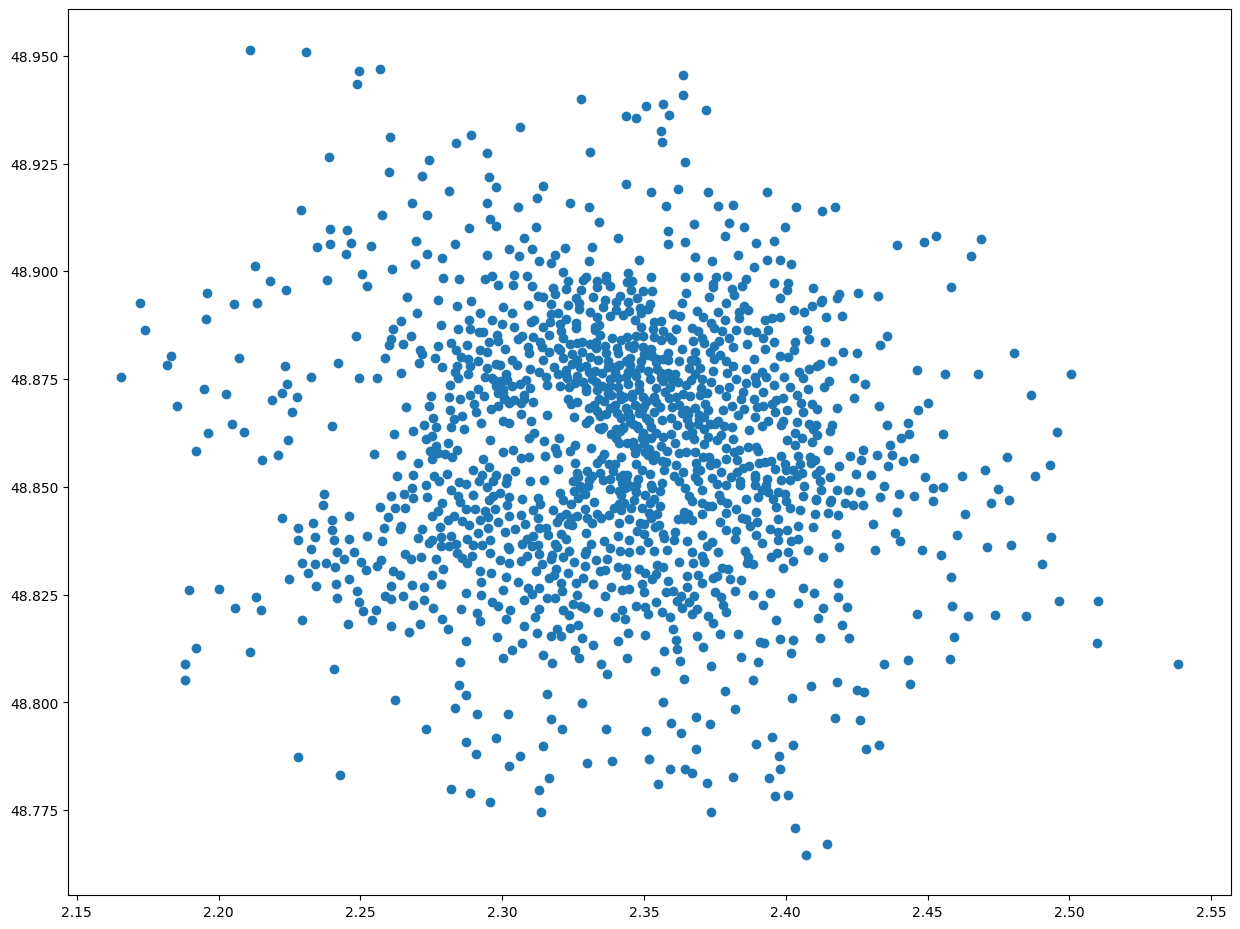

In [24]:
geo_data.plot(figsize=(15, 15));

Demandons à GeoPandas de changer la taille de nos marqueurs en fonction de la capacité de chaque station :

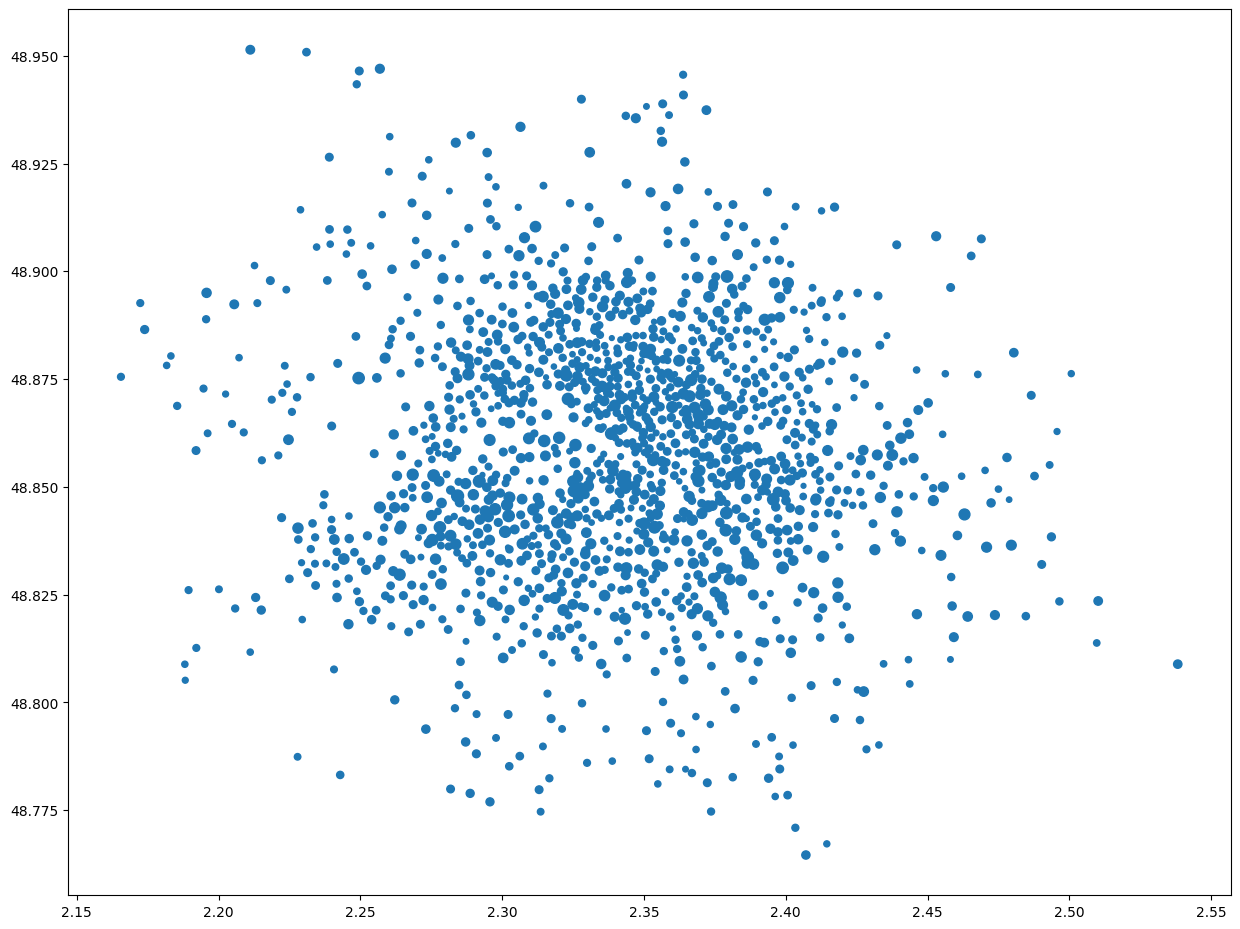

In [25]:
geo_data.plot(markersize=geo_data.capacity, figsize=(15, 15));

Ou encore, de changer la taille de nos marqueurs en fonction du nombre de vélibs dans la station :

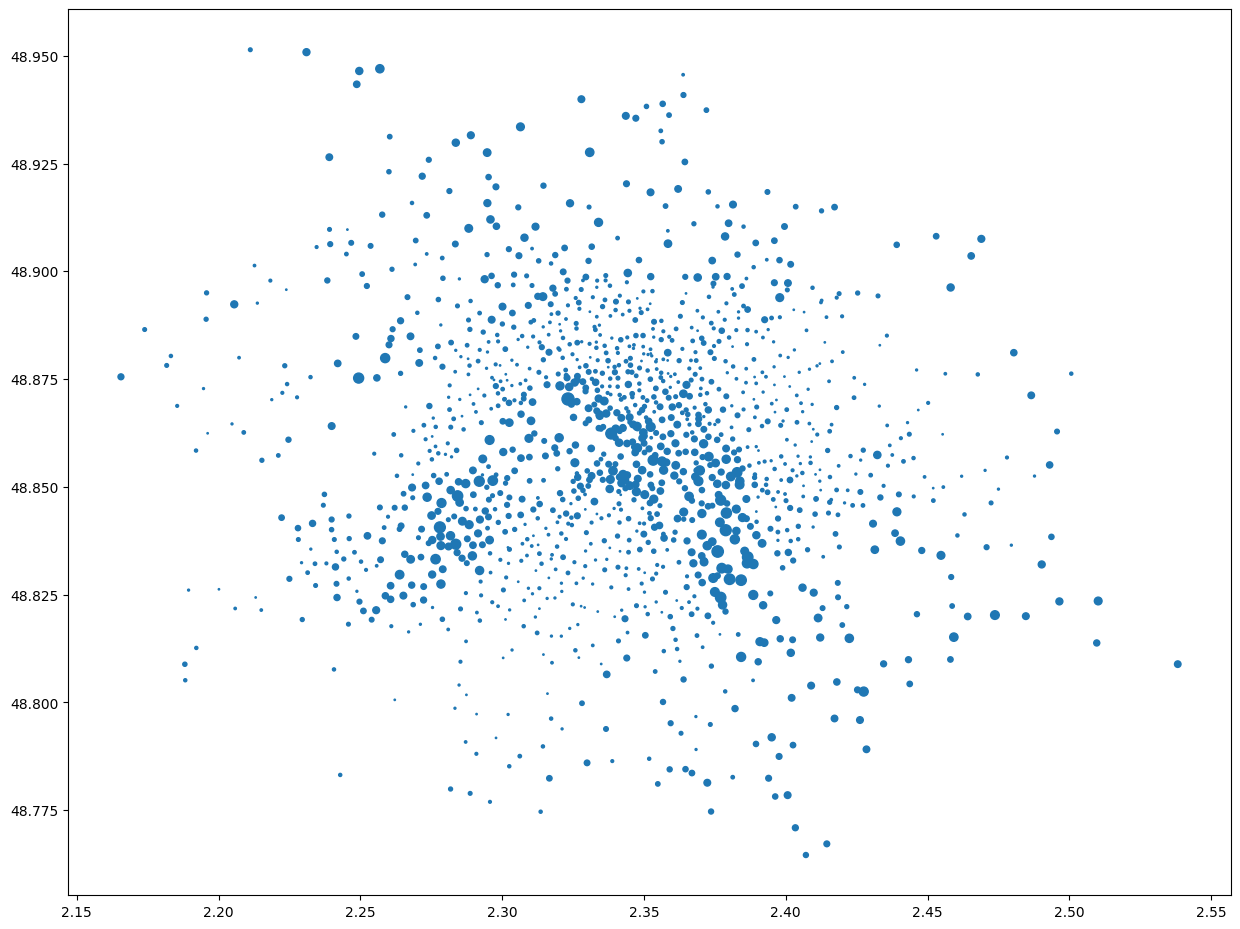

In [26]:
geo_data.plot(markersize=geo_data.num_bikes_available, figsize=(15, 15));

On se représente déjà mieux la distribution du nombre de vélibs dans Paris ! Mais au lieu de jouer uniquement avec la taille des marqueurs, on peut aussi varier leur couleur en spécifiant une carte de couleur `cmap` :

> les différentes cartes des couleurs peuvent être consulter ici [matplotlib colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

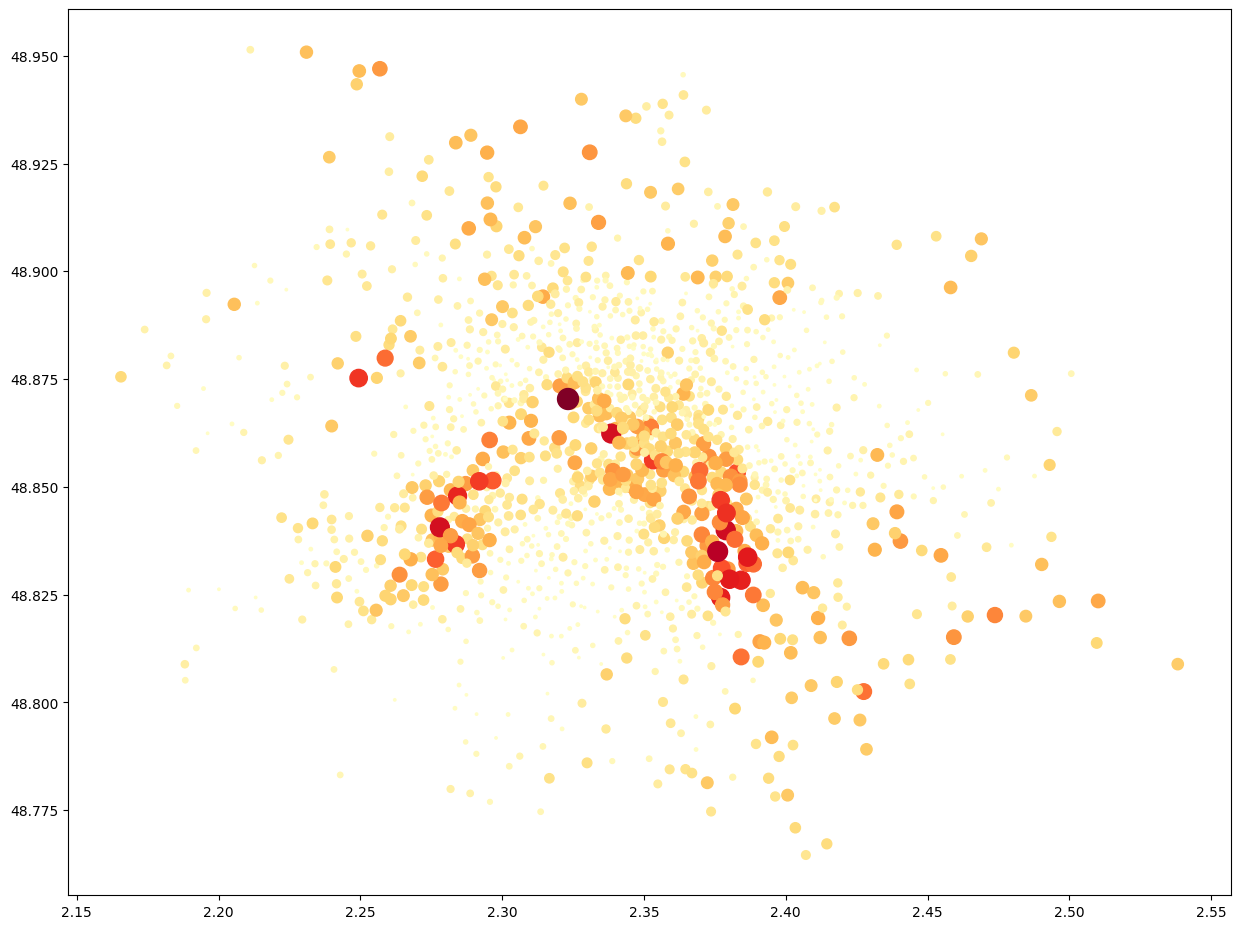

In [27]:
# figure et axes graphiques
f, axes = plt.subplots(1, figsize=(15,15))

# affichage des stations gélocalisés
geo_data.plot(geo_data.num_bikes_available, markersize=3*geo_data.num_bikes_available, cmap="YlOrRd", ax=axes);

# affichage forçé
plt.show()

Maintenant nous allons pouvoir ajouter un fond de carte provenant, par exemple, de [OpenStreetMap](https://www.openstreetmap.fr/). Il existe un module python pour faire ça en une ligne et ce module s'appelle `contextily`. Le seul pré-requis est de convertir les coordonnées GPS au format EPSG:3857, mais GeoPandas fait ça très bien :

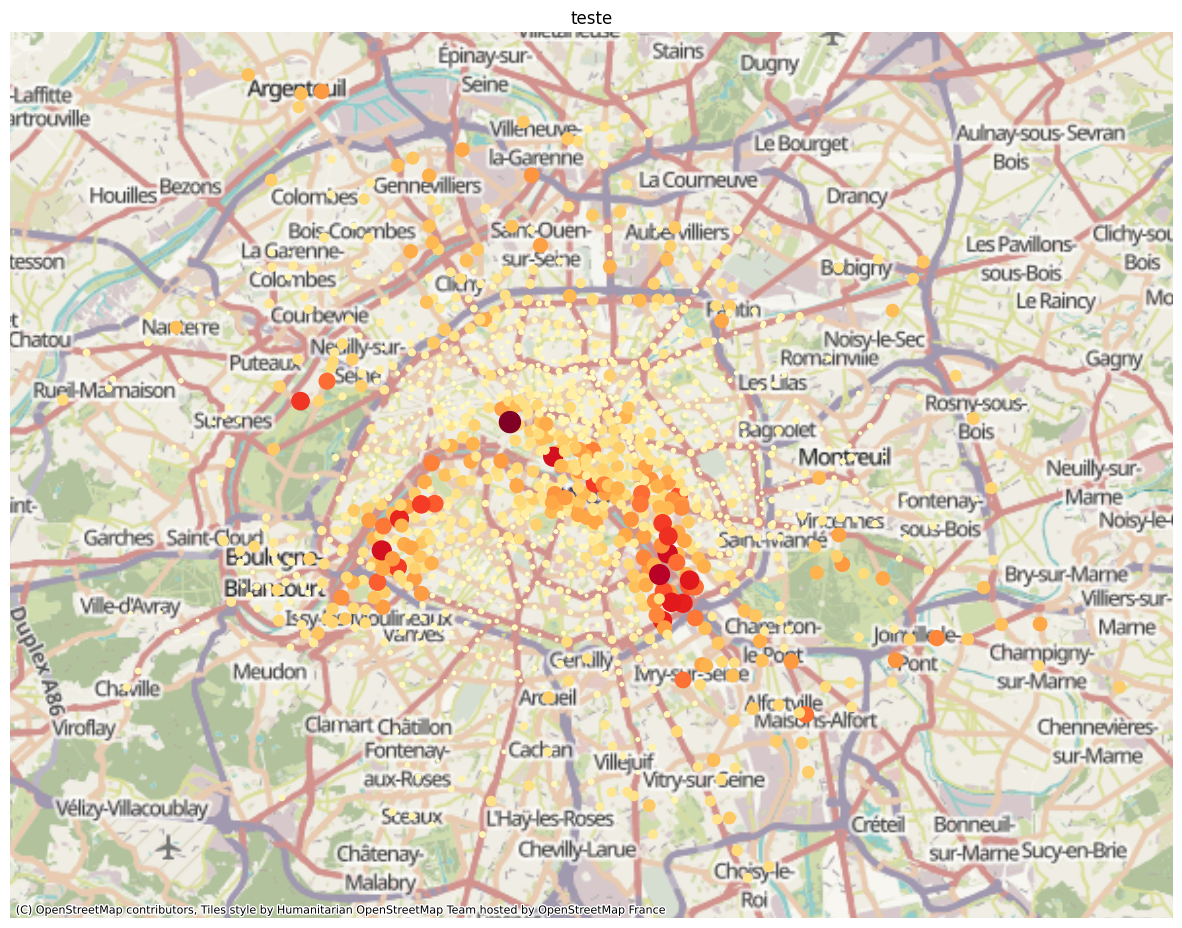

In [30]:
# conversion de coordonnées : contextily utilise les coordonnées EPSG:3857
geo_data_with_map = geo_data.to_crs(epsg=3857)

# figure et axes graphiques
f, axes = plt.subplots(1, figsize=(15,15))

# affichage des stations gélocalisés
geo_data_with_map.plot(geo_data.num_bikes_available, markersize=3*geo_data.num_bikes_available, cmap="YlOrRd", ax=axes)

# effacement des axes gradués
axes.set_axis_off()

plt.title("teste")

# ajout du fond de carte correspondant aux coordonnées géographiques des stations
ctx.add_basemap(axes)

# affichage forçé
plt.show()

## Exportation des représentations

Il s'agit ici d'exporter les représentations graphiques obtenues sous forme d'images sauvegardées dans un dossier sur le Drive.

Ce dossier est `/SAE15/web/data/` présent dans l'arborescence de votre projet.

Les images, sauvegardées dans cet emplacement, seront intégrées automatiquement dans la page Web `projetSAE15.html`, page de publication des résultats de l'analyse des données Vélib.

Le code suivant montre de quelle manière opérer une telle sauvegarde après avoir affiché une figure :


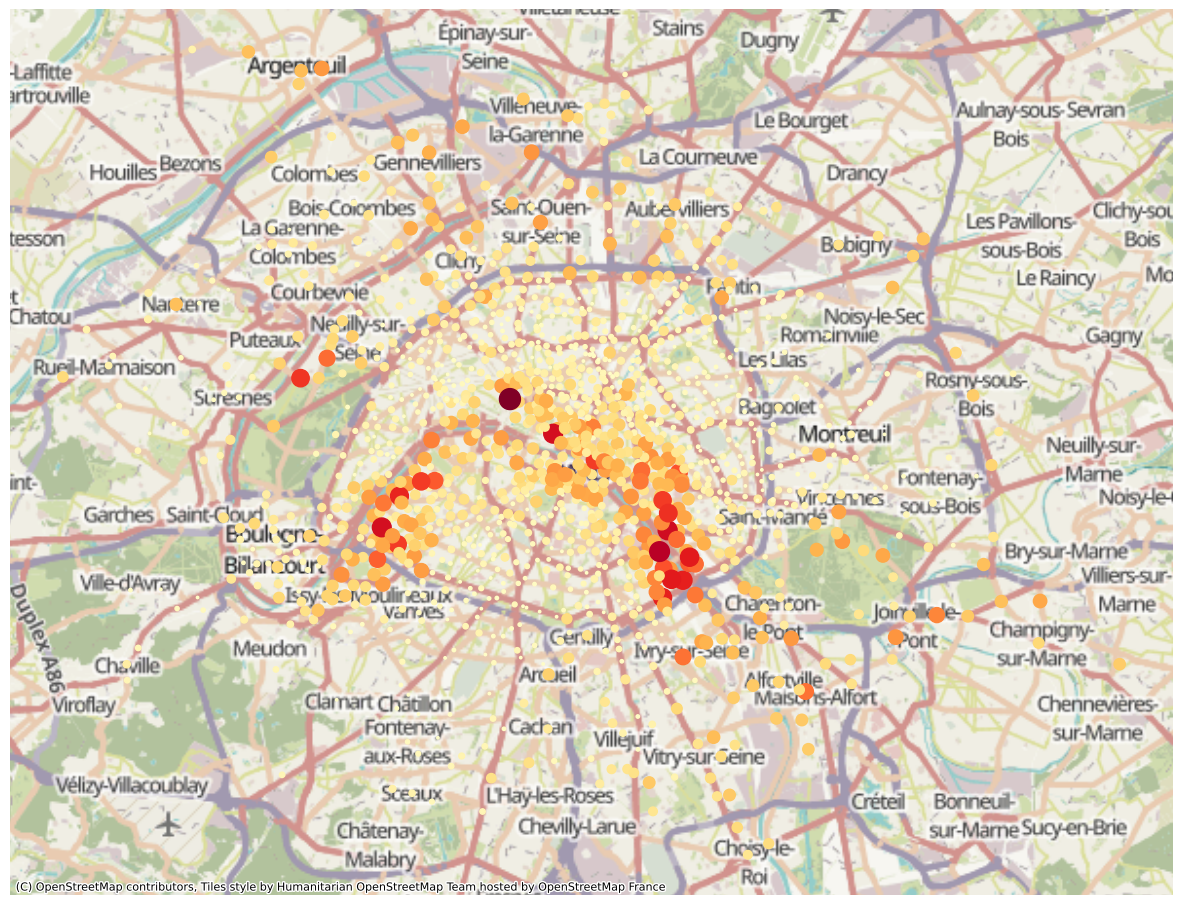

In [29]:
# conversion de coordonnées : contextily utilise les coordonnées EPSG:3857
geo_data_with_map = geo_data.to_crs(epsg=3857)

# figure et axes graphiques
f, axes = plt.subplots(1, figsize=(15,15))

# affichage des stations gélocalisés
geo_data_with_map.plot(geo_data.num_bikes_available, markersize=3*geo_data.num_bikes_available, cmap="YlOrRd", ax=axes);

# effacement des axes gradués
axes.set_axis_off()

# ajout du fond de carte correspondant aux coordonnées géographiques des stations
ctx.add_basemap(axes)

# sauvegarde de la figure courante sur le Drive au format SVG (vectoriel)
plt.savefig('/content/drive/My Drive/Colab Notebooks/SAE15/web/data/carte1.svg')

# affichage forçé
plt.show()

## Générez votre propre carte

On vous demande de générer votre propre carte des stations Vélib géolocalisées afin de représenter une information de votre choix (capacité des stations, stands disponibles, taux de disponibilité des vélos ou des stands,...).

> On pourra également ajouter un titre (méthode `title` pour les axes) avec la date de dernière mise à jour des données (fonction spécifique `sae15_spec.getLatestDate()`).

> Il est également possible de représenter deux types d'informations sur une même carte en jouant avec la taille des points d'une part et, d'autre part avec leur couleur.

⚠ Vérifier la bonne exportation de la carte vers le dossier destination `SAE15/web/data/`.

In [40]:
def exportCityMap(geo_stations, marker_size, marker_color, title, date=None, filename=None) :
  # figure et axes
  f, axes = plt.subplots(1, figsize=(15,15))

  # conversion des coordonnées dans le système approprié
  geo_data_with_map = geo_stations.to_crs(epsg=3857)

  # affichage en fonction des variables passées en argument
  geo_data_with_map.plot(marker_size, markersize=3*marker_size, cmap=marker_color, ax=axes)

  # effacement des axes gradués
  axes.set_axis_off()

  # ajout du fond de carte correspondant aux coordonnées géographiques des stations
  ctx.add_basemap(axes)

  # affichage du titre avec la date de mise à jour
  plt.title(title + " dernière mise à jour " + str(date))

  # sauvegarde de la carte sur le Drive
  plt.savefig(filename)

  # affichage forçé
  plt.show()

  return

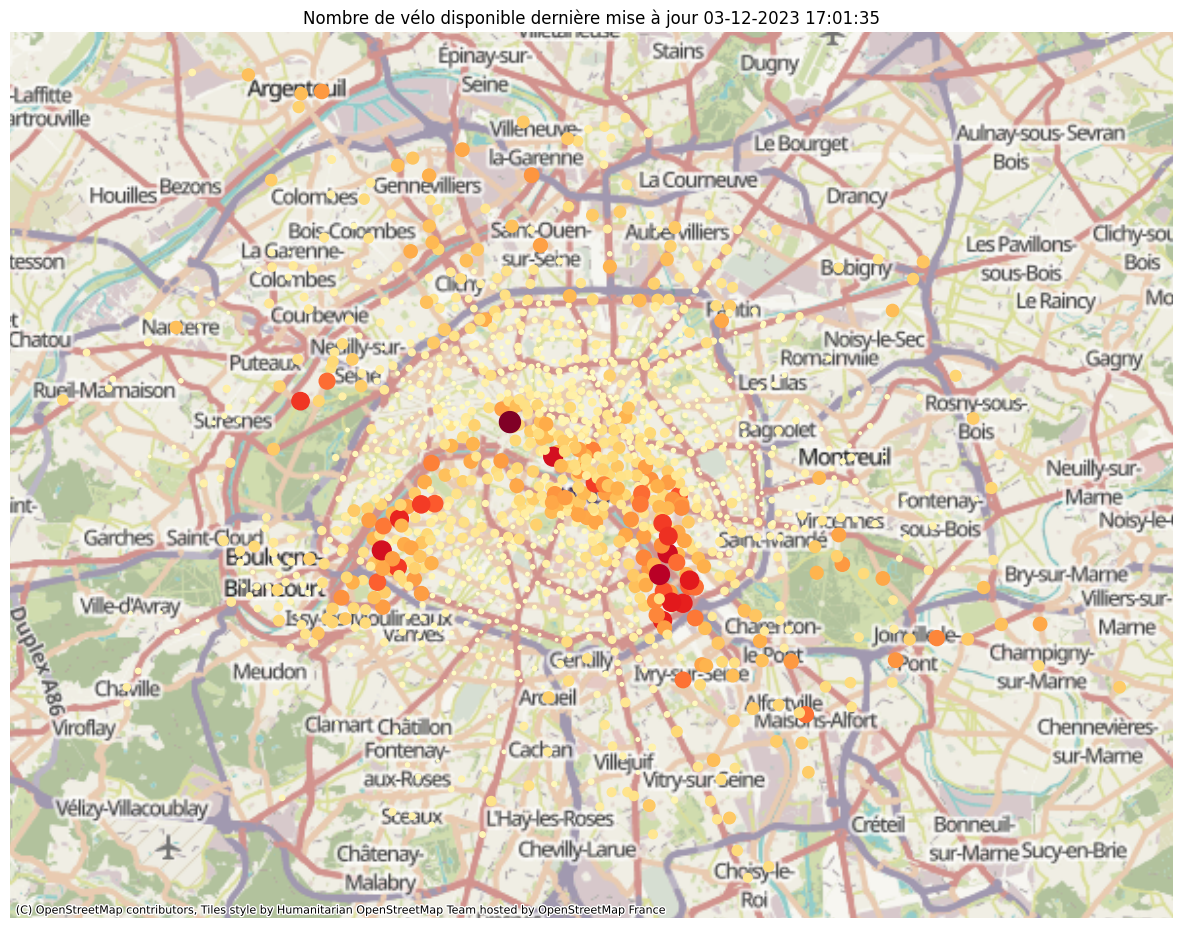

In [43]:
date = spec.getLatestDate(geo_data)
filaname = '/content/drive/My Drive/Colab Notebooks/SAE15/web/data/nombre de vélo disponible'+str(date.iloc[-1])+"svg"

exportCityMap(geo_data, geo_data.num_bikes_available, "YlOrRd", "Nombre de vélo disponible", date.iloc[-1], filename=filaname)

# Importation de la fonction réaliser dans le fichier python sae15_spec

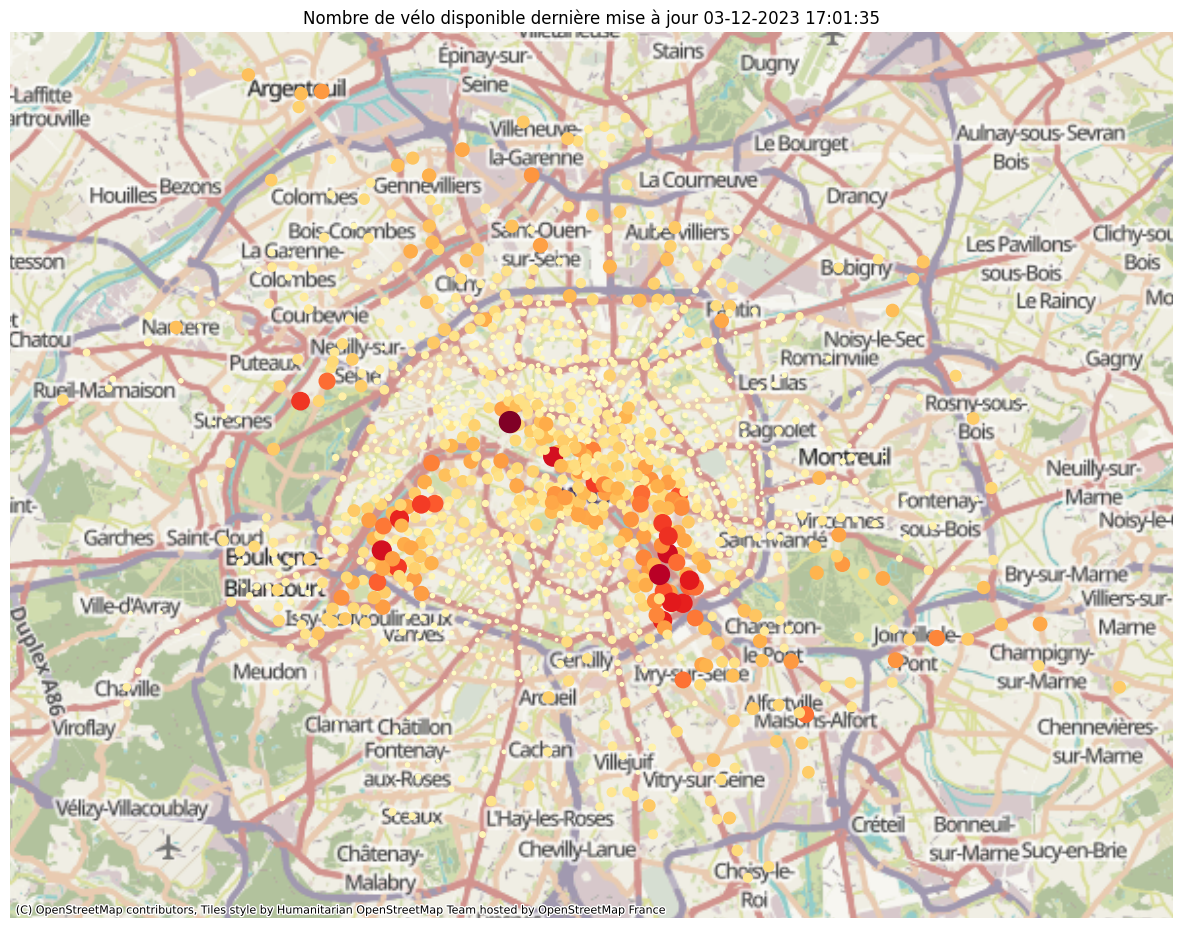

In [42]:
date = spec.getLatestDate(geo_data)
filaname = '/content/drive/My Drive/Colab Notebooks/SAE15/web/data/nombre de vélo disponible'+str(date.iloc[-1])+"svg"

spec.exportCityMap(geo_data, geo_data.num_bikes_available, "YlOrRd", "Nombre de vélo disponible", date.iloc[-1], filename=filaname)

---
🎯  Livrer ce test unitaire sur Eprel en fin de séance

---



